In [1]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs

In [2]:
#areacello
fn_aco = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Ofx/areacello/gn/areacello_Ofx_EC-Earth3_historical_r1i1p1f1_gn.nc'
aco = xr.open_dataset(fn_aco)

fns_mlotst_sd_hist = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/mlotst/gn/*.nc'
mlotst_sd_hist = xr.open_mfdataset(fns_mlotst_sd_hist)

fns_mlotst_sd_585 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/mlotst/gn/*.nc'
mlotst_sd_585 = xr.open_mfdataset(fns_mlotst_sd_585)

fns_mlotst_5icu_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/mlotst/gn/v20230720/*.nc'
mlotst_5icu_hist = xr.open_mfdataset(fns_mlotst_5icu_hist)

fns_mlotst_5icu_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/mlotst/gn/v20230720/*.nc'
mlotst_5icu_585 = xr.open_mfdataset(fns_mlotst_5icu_585)

fns_mlotst_lcic_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/mlotst/gn/v20230713/*.nc'
mlotst_lcic_hist = xr.open_mfdataset(fns_mlotst_lcic_hist)

fns_mlotst_lcic_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/mlotst/gn/v20230720/*.nc'
mlotst_lcic_585 = xr.open_mfdataset(fns_mlotst_lcic_585)


In [3]:
sizemlf = 2

In [4]:
def map_plotter(data, dataset, ax, colormap, cmin, cmax, titlestring, cbarlabel): #
    ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.gridlines()
    ax.coastlines()

    # Make circular instead of square plot by setting circular boundaries
    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    im = ax.pcolormesh(dataset.longitude, dataset.latitude,
                    data, 
                    cmap=colormap, vmin = cmin, vmax = cmax,
                    transform=ccrs.PlateCarree())
    ax.set_title(titlestring, fontsize = 10*sizemlf)

    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(cbarlabel, fontsize = 8*sizemlf)
    cbar.ax.tick_params(labelsize=8*sizemlf)

    return im

In [5]:
stdrange = 300
maxdepthrange = 1000

/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/reductions.py:651: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/reductions.py:651: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/reductions.py:651: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


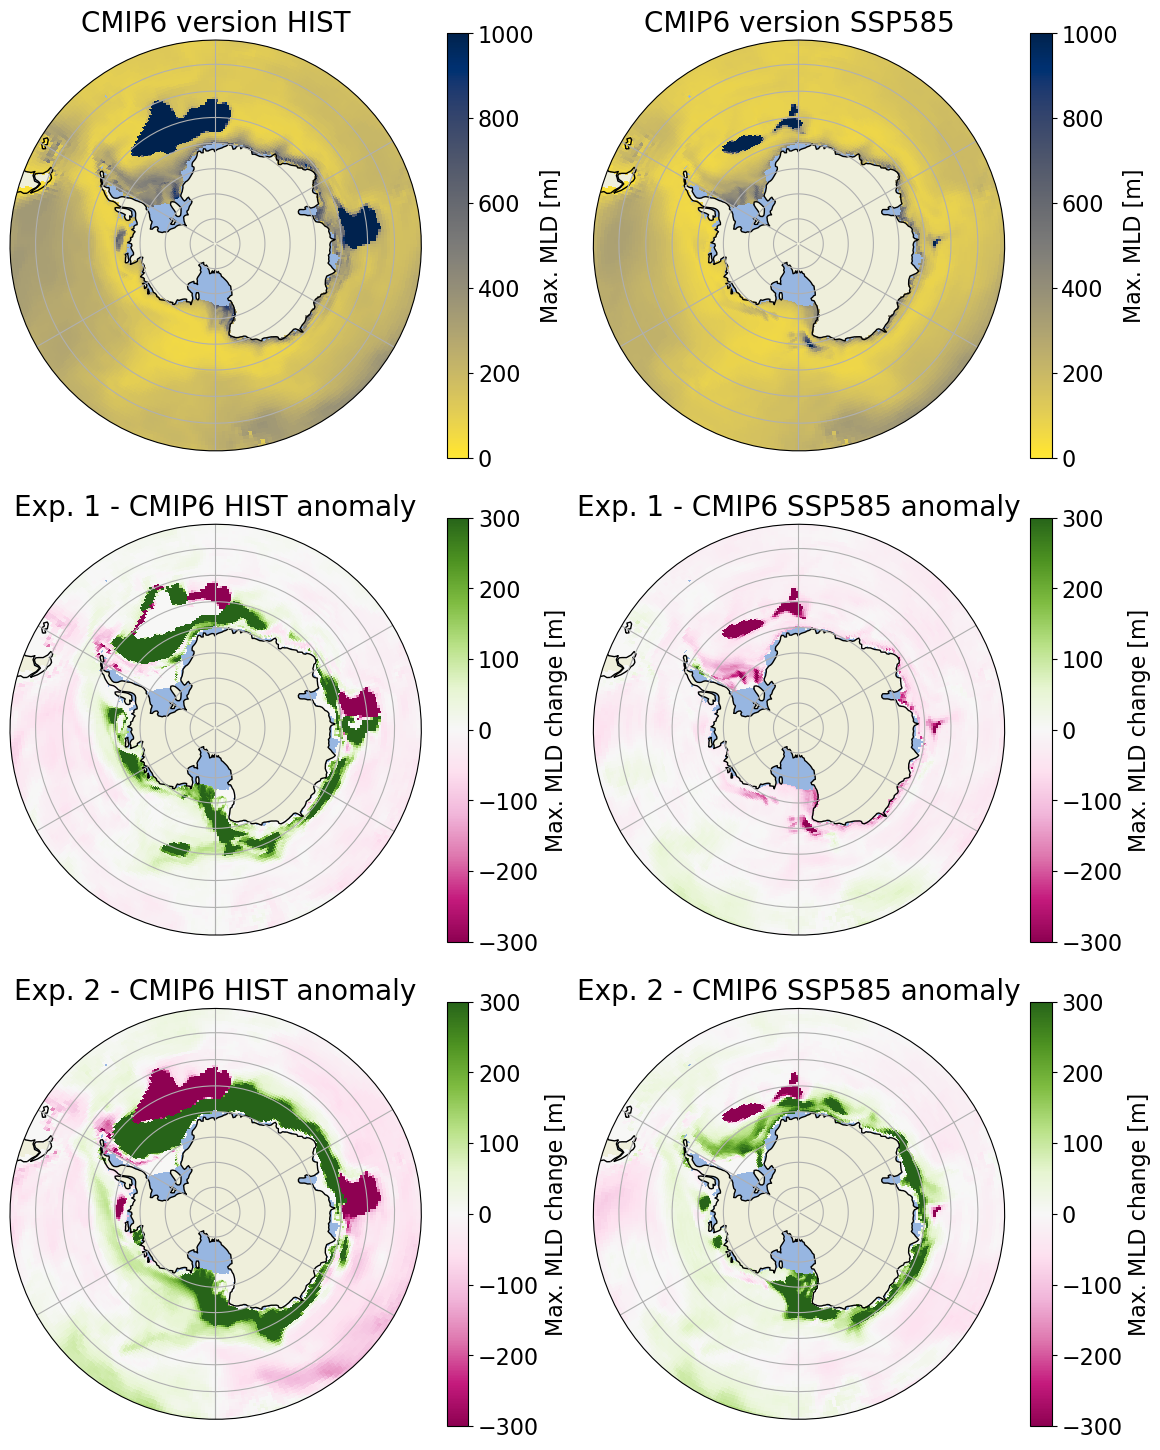

In [6]:
# Create a figure with 8 subplots 2 by 4
fig, axes = plt.subplots(3, 2, figsize=(6*sizemlf, 8*sizemlf), subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig.tight_layout(pad=2)
#fig.suptitle("T400m", fontsize=28)
level = 48

cmin = 0
cmax = 1000
map_plotter(mlotst_sd_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time'), 
            mlotst_sd_hist, axes[0, 0], 'cividis_r', cmin, cmax,
            'CMIP6 version HIST', 'Max. MLD [m]')

map_plotter(mlotst_sd_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time'), 
            mlotst_sd_585, axes[0, 1], 'cividis_r', cmin, cmax,
            'CMIP6 version SSP585', 'Max. MLD [m]')

cmin = -300
cmax = 300
map_plotter(mlotst_5icu_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time') - mlotst_sd_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time'), 
            mlotst_sd_hist, axes[1, 0], 'PiYG', cmin, cmax,
            'Exp. 1 - CMIP6 HIST anomaly', 'Max. MLD change [m]')

map_plotter(mlotst_5icu_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time') - mlotst_sd_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time'), 
            mlotst_sd_585, axes[1, 1], 'PiYG', cmin, cmax,
            'Exp. 1 - CMIP6 SSP585 anomaly', 'Max. MLD change [m]')

cmin = -300
cmax = 300
map_plotter(mlotst_lcic_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time') - mlotst_sd_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time'), 
            mlotst_sd_hist, axes[2, 0], 'PiYG', cmin, cmax, 
            'Exp. 2 - CMIP6 HIST anomaly', 'Max. MLD change [m]')

map_plotter(mlotst_lcic_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time') - mlotst_sd_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time'), 
            mlotst_sd_hist, axes[2, 1], 'PiYG', cmin, cmax, 
            'Exp. 2 - CMIP6 SSP585 anomaly', 'Max. MLD change [m]')

# plt.figtext(0.01, 0.58, 'Means 1984-2014', fontsize = 10*sizemlf, rotation = 'vertical')
# plt.figtext(0.01, 0.12, 'Means 2070-2100', fontsize = 10*sizemlf, rotation = 'vertical')

plt.tight_layout(pad=1.2*sizemlf)
plt.subplots_adjust(top=0.9)
plt.show()

/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


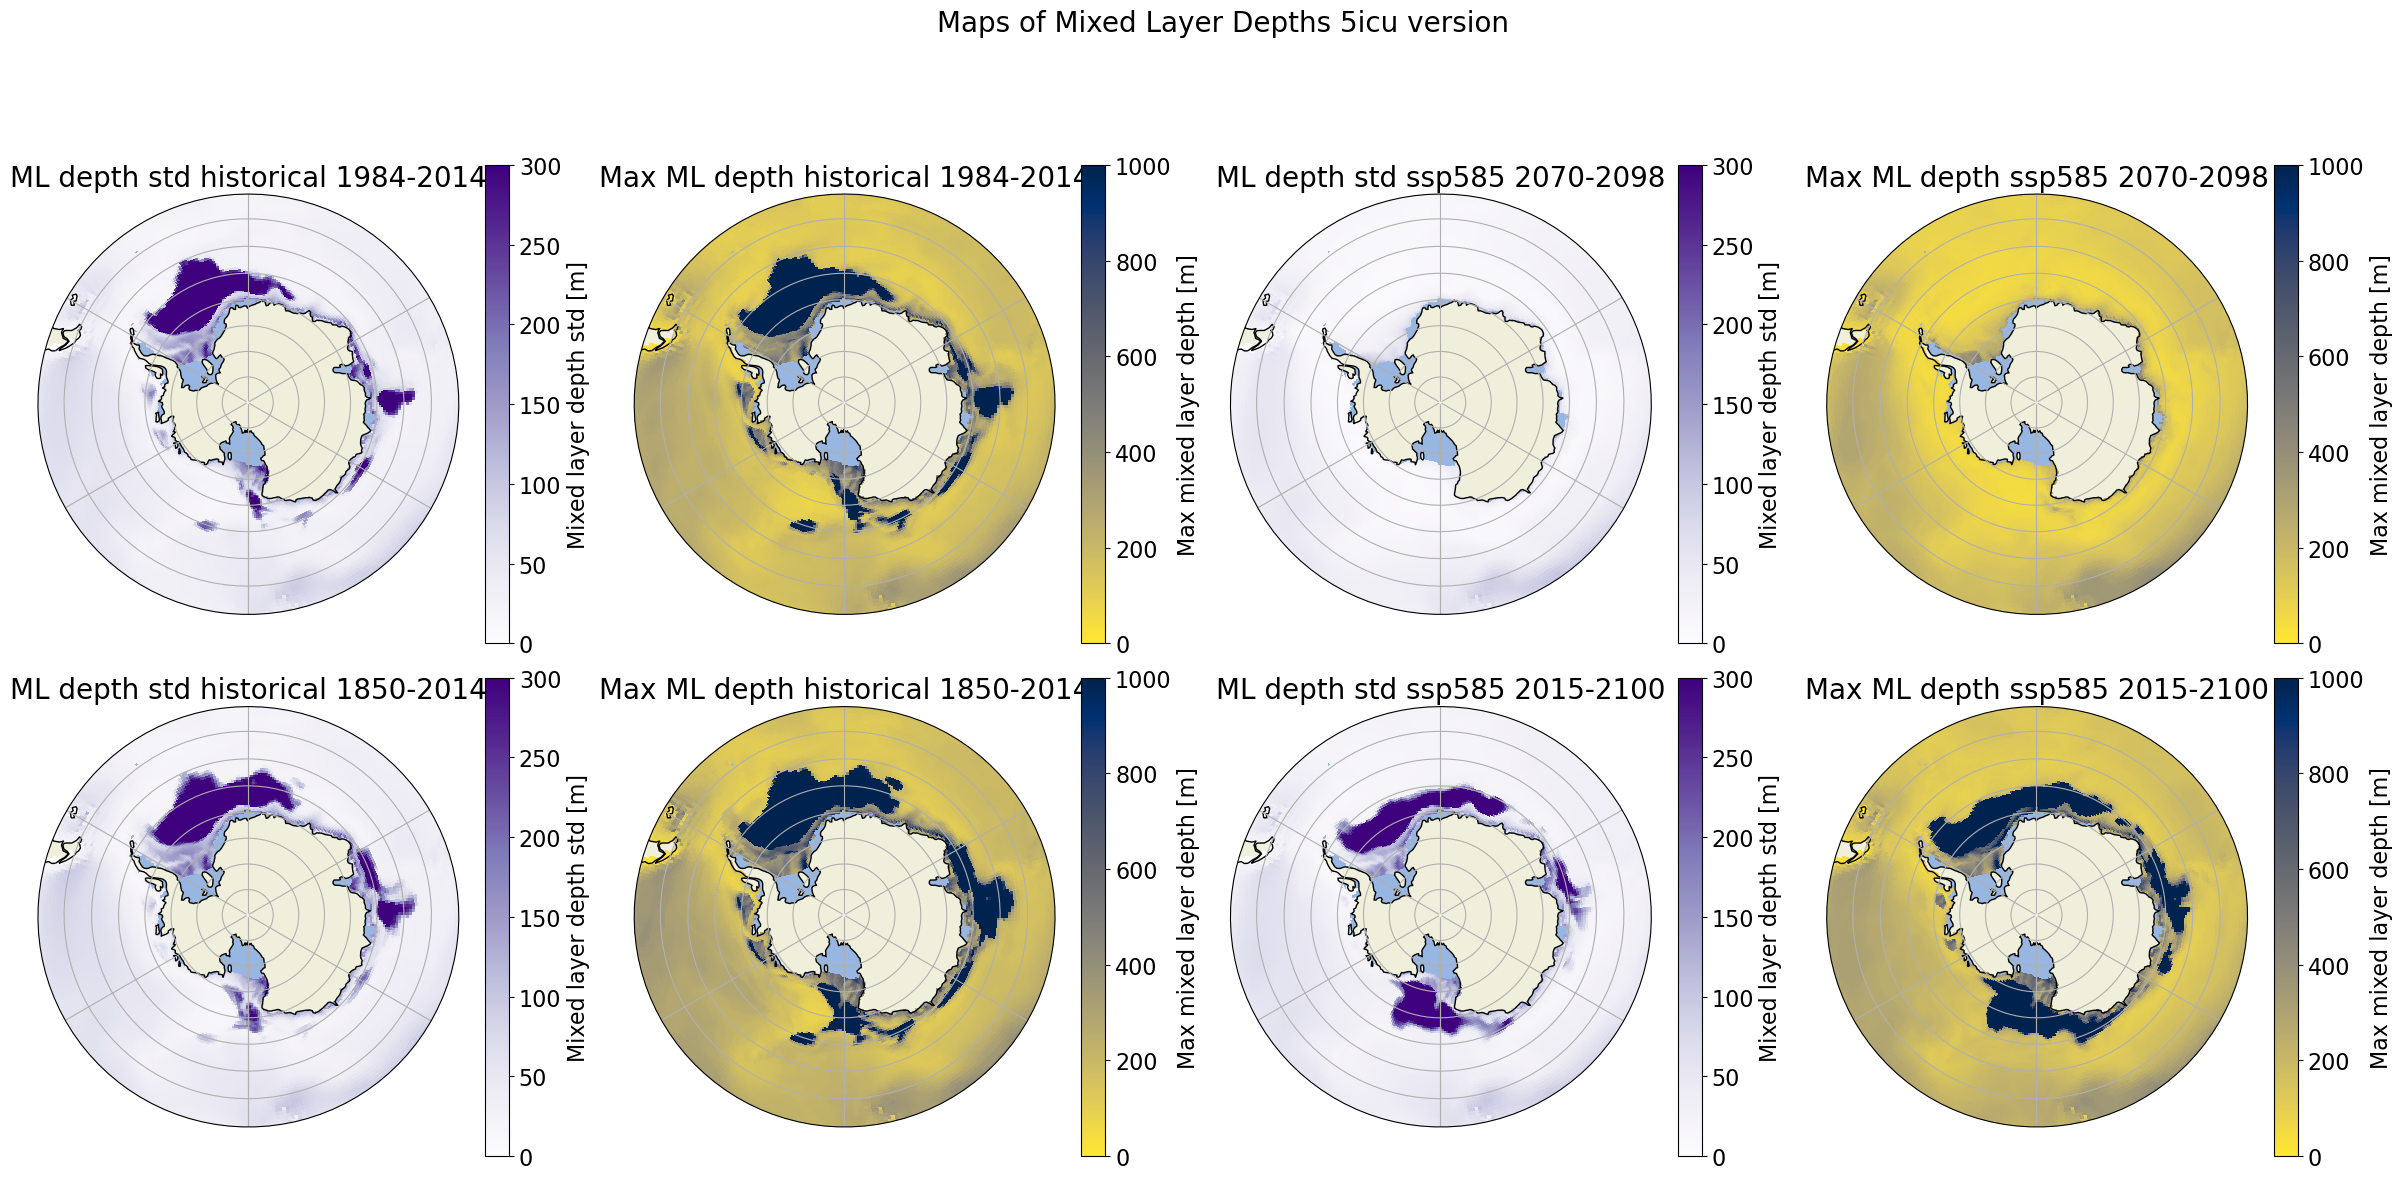

<Figure size 640x480 with 0 Axes>

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(24, 12), subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig.suptitle("Maps of Mixed Layer Depths 5icu version", fontsize=20)

map_plotter(mlotst_5icu_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).std('time'), 
            mlotst_5icu_hist, axes[0, 0], 'Purples', 0, stdrange, 
            'ML depth std historical 1984-2014', 'Mixed layer depth std [m]')

map_plotter(mlotst_5icu_hist.mlotst.std('time'), 
            mlotst_5icu_hist, axes[1, 0], 'Purples', 0, stdrange,
            'ML depth std historical 1850-2014', 'Mixed layer depth std [m]')

map_plotter(mlotst_5icu_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time'), 
            mlotst_5icu_hist, axes[0, 1], 'cividis_r', 0, maxdepthrange,
            'Max ML depth historical 1984-2014', 'Max mixed layer depth [m]')

map_plotter(mlotst_5icu_hist.mlotst.max('time'),
            mlotst_5icu_hist, axes[1, 1], 'cividis_r', 0, maxdepthrange,
            'Max ML depth historical 1850-2014', 'Max mixed layer depth [m]')

map_plotter(mlotst_5icu_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).std('time'), 
            mlotst_5icu_585, axes[0, 2], 'Purples', 0, stdrange,
            'ML depth std ssp585 2070-2098', 'Mixed layer depth std [m]')

map_plotter(mlotst_5icu_585.mlotst.std('time'), 
            mlotst_5icu_585, axes[1, 2], 'Purples', 0, stdrange,
            'ML depth std ssp585 2015-2100', 'Mixed layer depth std [m]')

map_plotter(mlotst_5icu_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time'), 
            mlotst_5icu_585, axes[0, 3], 'cividis_r', 0, maxdepthrange,
            'Max ML depth ssp585 2070-2098', 'Max mixed layer depth [m]')

map_plotter(mlotst_5icu_585.mlotst.max('time'),
            mlotst_5icu_585, axes[1, 3], 'cividis_r', 0, maxdepthrange,
            'Max ML depth ssp585 2015-2100', 'Max mixed layer depth [m]')


plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
plt.clf()

/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


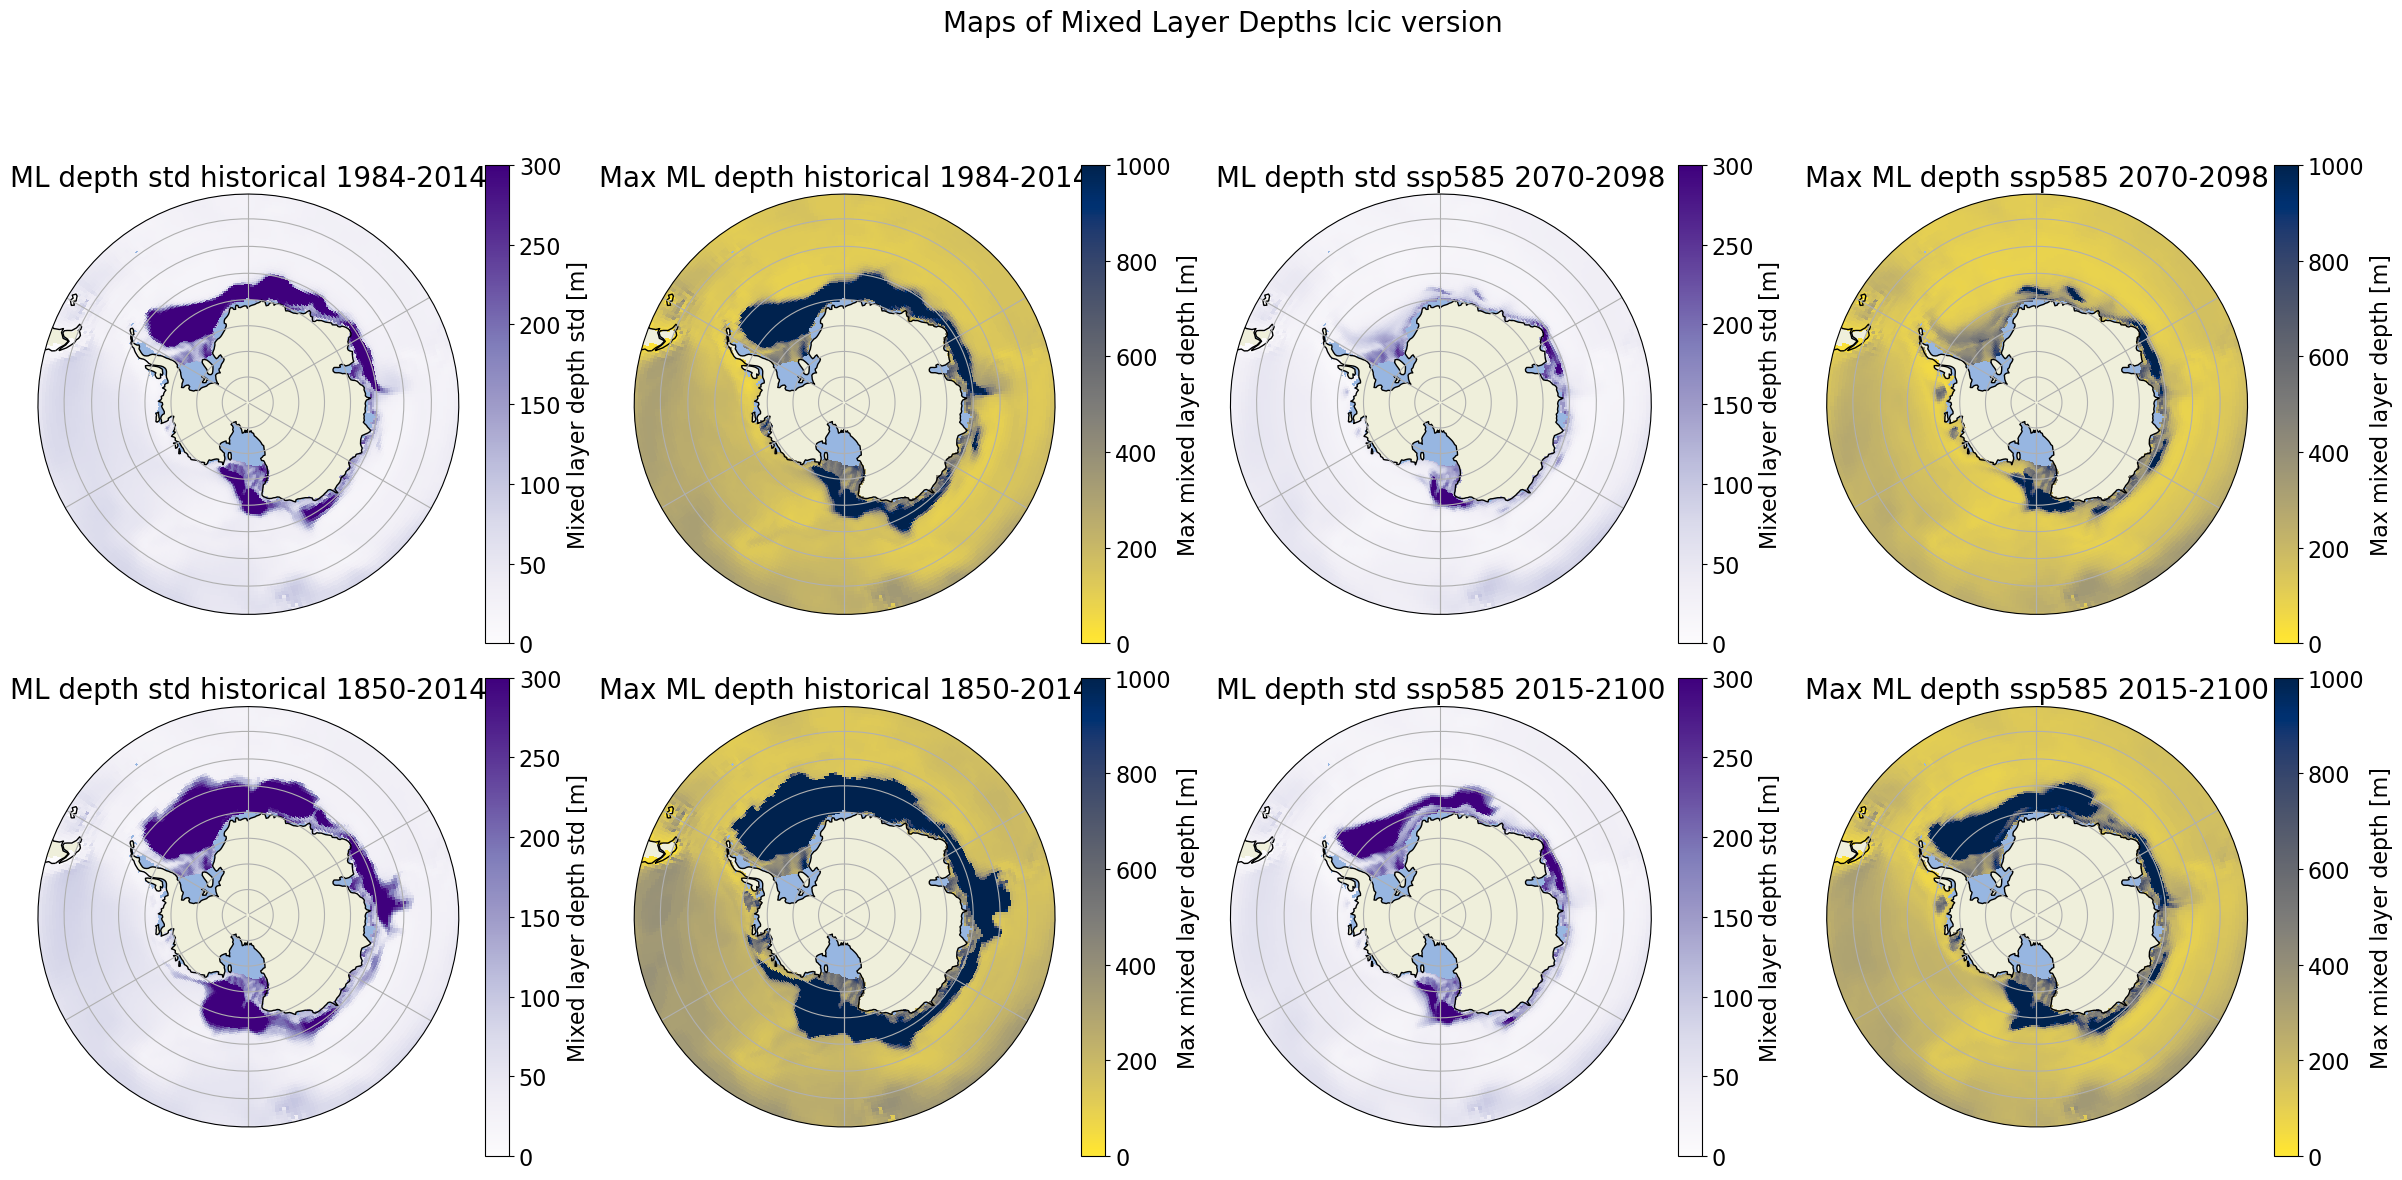

<Figure size 640x480 with 0 Axes>

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(24, 12), subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig.suptitle("Maps of Mixed Layer Depths lcic version", fontsize=20)

map_plotter(mlotst_lcic_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).std('time'), 
            mlotst_lcic_hist, axes[0, 0], 'Purples', 0, stdrange, 
            'ML depth std historical 1984-2014', 'Mixed layer depth std [m]')

map_plotter(mlotst_lcic_hist.mlotst.std('time'), 
            mlotst_lcic_hist, axes[1, 0], 'Purples', 0, stdrange,
            'ML depth std historical 1850-2014', 'Mixed layer depth std [m]')

map_plotter(mlotst_lcic_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time'), 
            mlotst_lcic_hist, axes[0, 1], 'cividis_r', 0, maxdepthrange,
            'Max ML depth historical 1984-2014', 'Max mixed layer depth [m]')

map_plotter(mlotst_lcic_hist.mlotst.max('time'),
            mlotst_lcic_hist, axes[1, 1], 'cividis_r', 0, maxdepthrange,
            'Max ML depth historical 1850-2014', 'Max mixed layer depth [m]')

map_plotter(mlotst_lcic_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).std('time'), 
            mlotst_lcic_585, axes[0, 2], 'Purples', 0, stdrange,
            'ML depth std ssp585 2070-2098', 'Mixed layer depth std [m]')

map_plotter(mlotst_lcic_585.mlotst.std('time'), 
            mlotst_lcic_585, axes[1, 2], 'Purples', 0, stdrange,
            'ML depth std ssp585 2015-2100', 'Mixed layer depth std [m]')

map_plotter(mlotst_lcic_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time'), 
            mlotst_lcic_585, axes[0, 3], 'cividis_r', 0, maxdepthrange,
            'Max ML depth ssp585 2070-2098', 'Max mixed layer depth [m]')

map_plotter(mlotst_lcic_585.mlotst.max('time'),
            mlotst_lcic_585, axes[1, 3], 'cividis_r', 0, maxdepthrange,
            'Max ML depth ssp585 2015-2100', 'Max mixed layer depth [m]')


plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
plt.clf()

In [9]:
stdrange = 300
maxdepthrange = 1000

/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


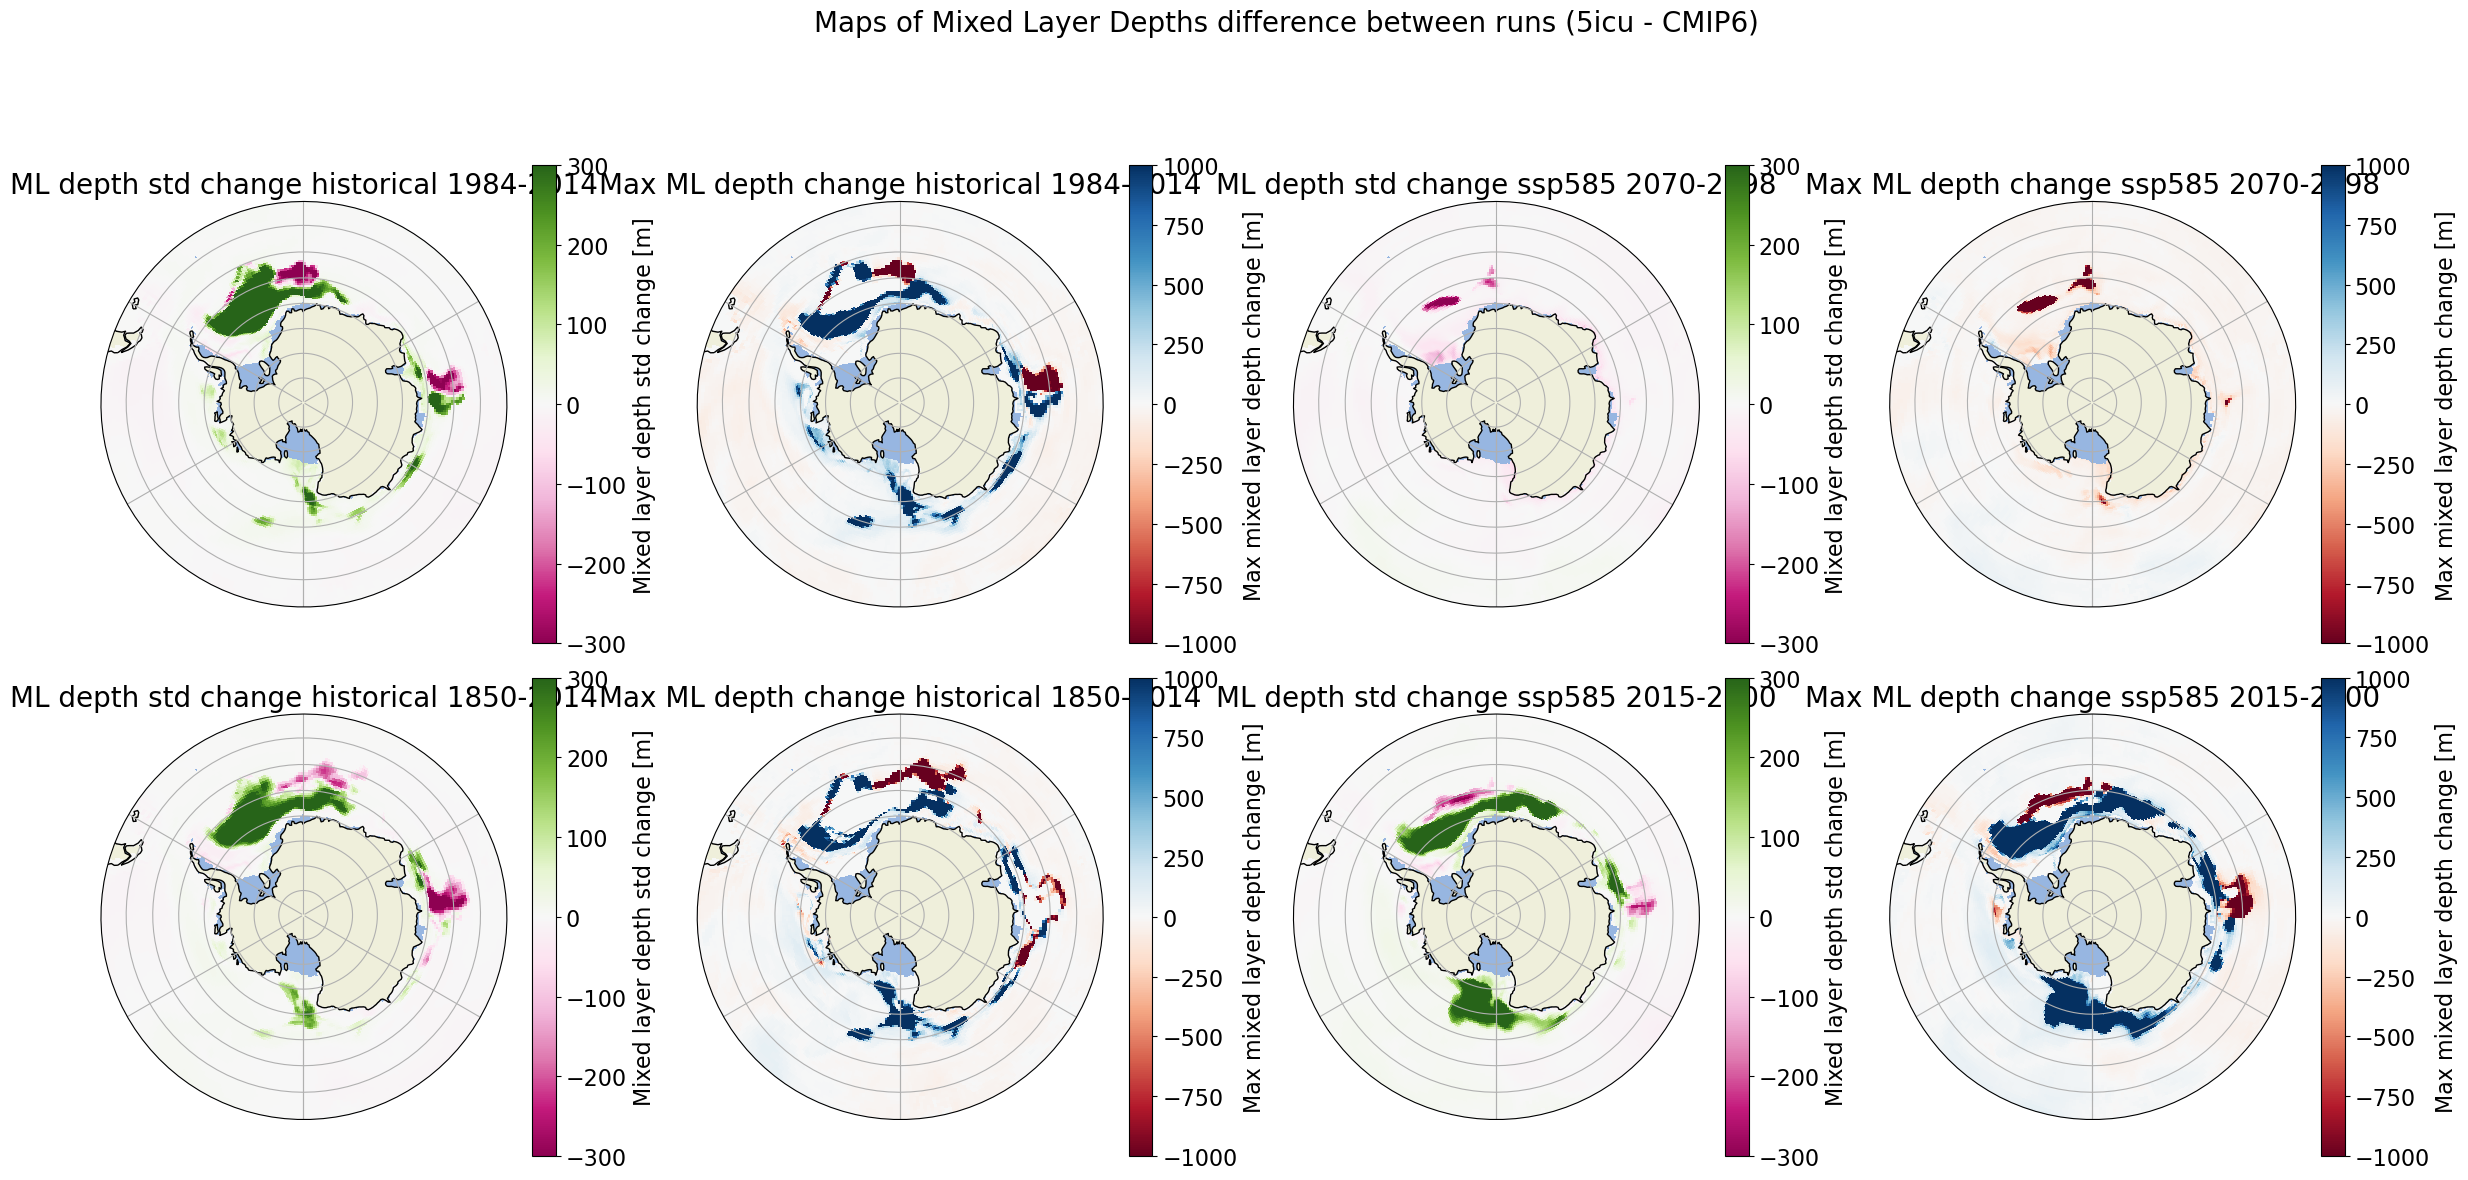

<Figure size 640x480 with 0 Axes>

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(24, 12), subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig.suptitle("Maps of Mixed Layer Depths difference between runs (5icu - CMIP6)", fontsize=20)

map_plotter(mlotst_5icu_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).std('time') - mlotst_sd_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).std('time'), 
            mlotst_5icu_hist, axes[0, 0], 'PiYG', -stdrange, stdrange, 
            'ML depth std change historical 1984-2014', 'Mixed layer depth std change [m]')

map_plotter(mlotst_5icu_hist.mlotst.std('time') - mlotst_sd_hist.mlotst.std('time'), 
            mlotst_5icu_hist, axes[1, 0], 'PiYG', -stdrange, stdrange,
            'ML depth std change historical 1850-2014', 'Mixed layer depth std change [m]')

map_plotter(mlotst_5icu_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time') - mlotst_sd_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time'), 
            mlotst_5icu_hist, axes[0, 1], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change historical 1984-2014', 'Max mixed layer depth change [m]')

map_plotter(mlotst_5icu_hist.mlotst.max('time') - mlotst_sd_hist.mlotst.max('time'),
            mlotst_5icu_hist, axes[1, 1], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change historical 1850-2014', 'Max mixed layer depth change [m]')

map_plotter(mlotst_5icu_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).std('time') - mlotst_sd_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).std('time'), 
            mlotst_5icu_585, axes[0, 2], 'PiYG', -stdrange, stdrange,
            'ML depth std change ssp585 2070-2098', 'Mixed layer depth std change [m]')

map_plotter(mlotst_5icu_585.mlotst.std('time') - mlotst_sd_585.mlotst.std('time'), 
            mlotst_5icu_585, axes[1, 2], 'PiYG', -stdrange, stdrange,
            'ML depth std change ssp585 2015-2100', 'Mixed layer depth std change [m]')

map_plotter(mlotst_5icu_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time') - mlotst_sd_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time'), 
            mlotst_5icu_585, axes[0, 3], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change ssp585 2070-2098', 'Max mixed layer depth change [m]')

map_plotter(mlotst_5icu_585.mlotst.max('time')  - mlotst_sd_585.mlotst.max('time'),
            mlotst_5icu_585, axes[1, 3], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change ssp585 2015-2100', 'Max mixed layer depth change [m]')


plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
plt.clf()

/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


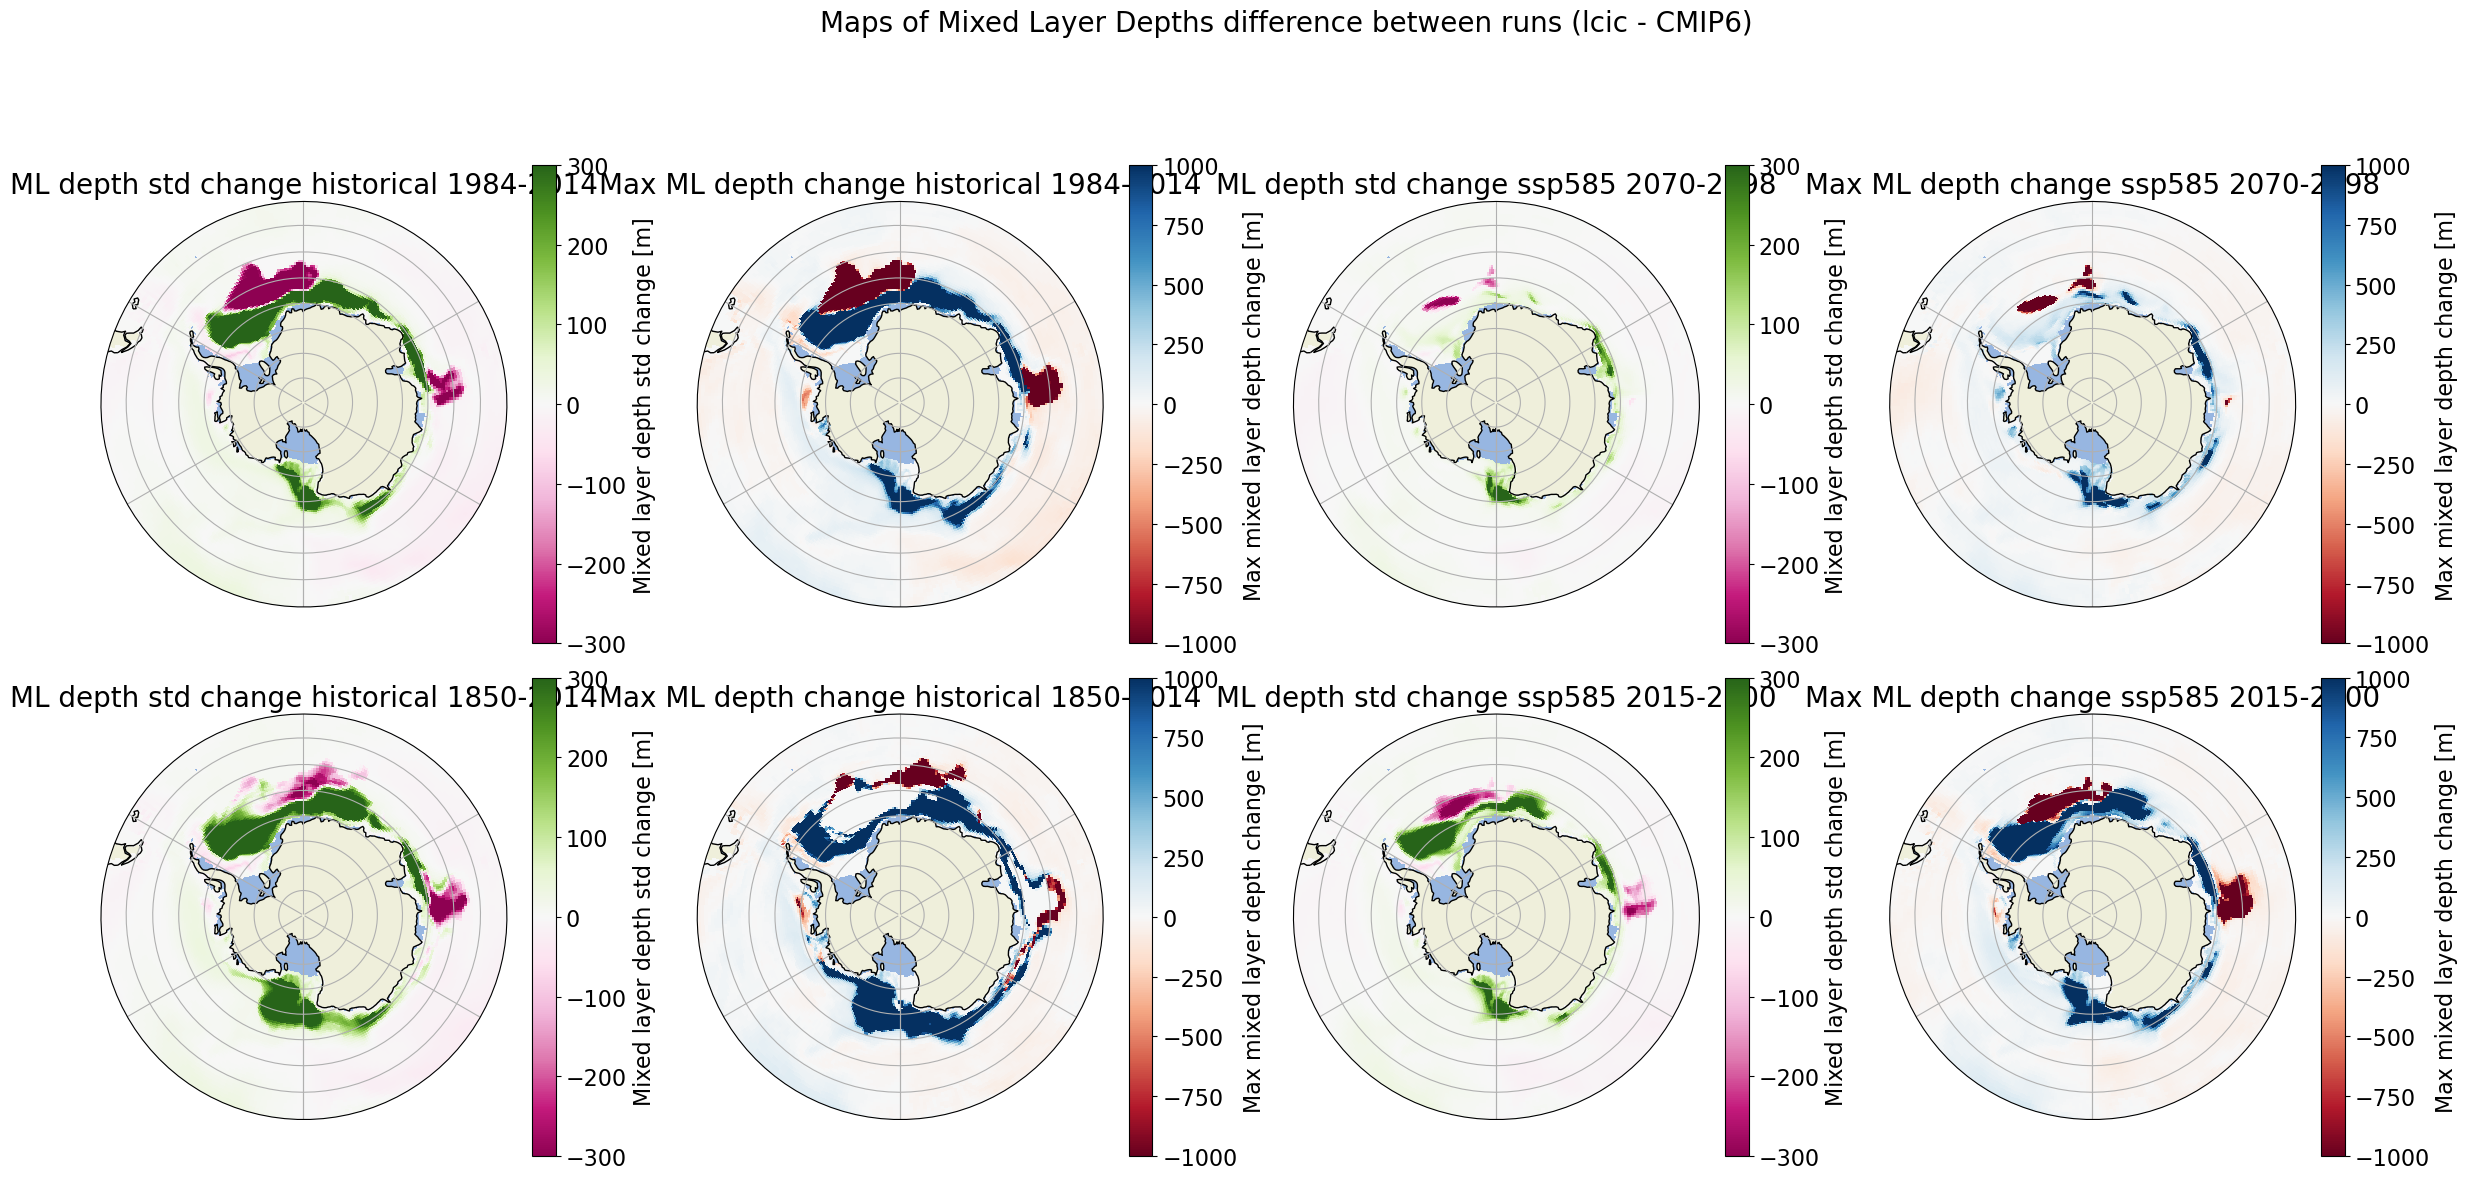

<Figure size 640x480 with 0 Axes>

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(24, 12), subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig.suptitle("Maps of Mixed Layer Depths difference between runs (lcic - CMIP6)", fontsize=20)

map_plotter(mlotst_lcic_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).std('time') - mlotst_sd_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).std('time'), 
            mlotst_lcic_hist, axes[0, 0], 'PiYG', -stdrange, stdrange, 
            'ML depth std change historical 1984-2014', 'Mixed layer depth std change [m]')

map_plotter(mlotst_lcic_hist.mlotst.std('time') - mlotst_sd_hist.mlotst.std('time'), 
            mlotst_lcic_hist, axes[1, 0], 'PiYG', -stdrange, stdrange,
            'ML depth std change historical 1850-2014', 'Mixed layer depth std change [m]')

map_plotter(mlotst_lcic_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time') - mlotst_sd_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time'), 
            mlotst_lcic_hist, axes[0, 1], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change historical 1984-2014', 'Max mixed layer depth change [m]')

map_plotter(mlotst_lcic_hist.mlotst.max('time') - mlotst_sd_hist.mlotst.max('time'),
            mlotst_lcic_hist, axes[1, 1], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change historical 1850-2014', 'Max mixed layer depth change [m]')

map_plotter(mlotst_lcic_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).std('time') - mlotst_sd_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).std('time'), 
            mlotst_lcic_585, axes[0, 2], 'PiYG', -stdrange, stdrange,
            'ML depth std change ssp585 2070-2098', 'Mixed layer depth std change [m]')

map_plotter(mlotst_lcic_585.mlotst.std('time') - mlotst_sd_585.mlotst.std('time'), 
            mlotst_lcic_585, axes[1, 2], 'PiYG', -stdrange, stdrange,
            'ML depth std change ssp585 2015-2100', 'Mixed layer depth std change [m]')

map_plotter(mlotst_lcic_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time') - mlotst_sd_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time'), 
            mlotst_lcic_585, axes[0, 3], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change ssp585 2070-2098', 'Max mixed layer depth change [m]')

map_plotter(mlotst_lcic_585.mlotst.max('time')  - mlotst_sd_585.mlotst.max('time'),
            mlotst_lcic_585, axes[1, 3], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change ssp585 2015-2100', 'Max mixed layer depth change [m]')


plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
plt.clf()

/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/usr/people/ijzerman/miniconda3/envs/jan_env/lib/python3.11/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


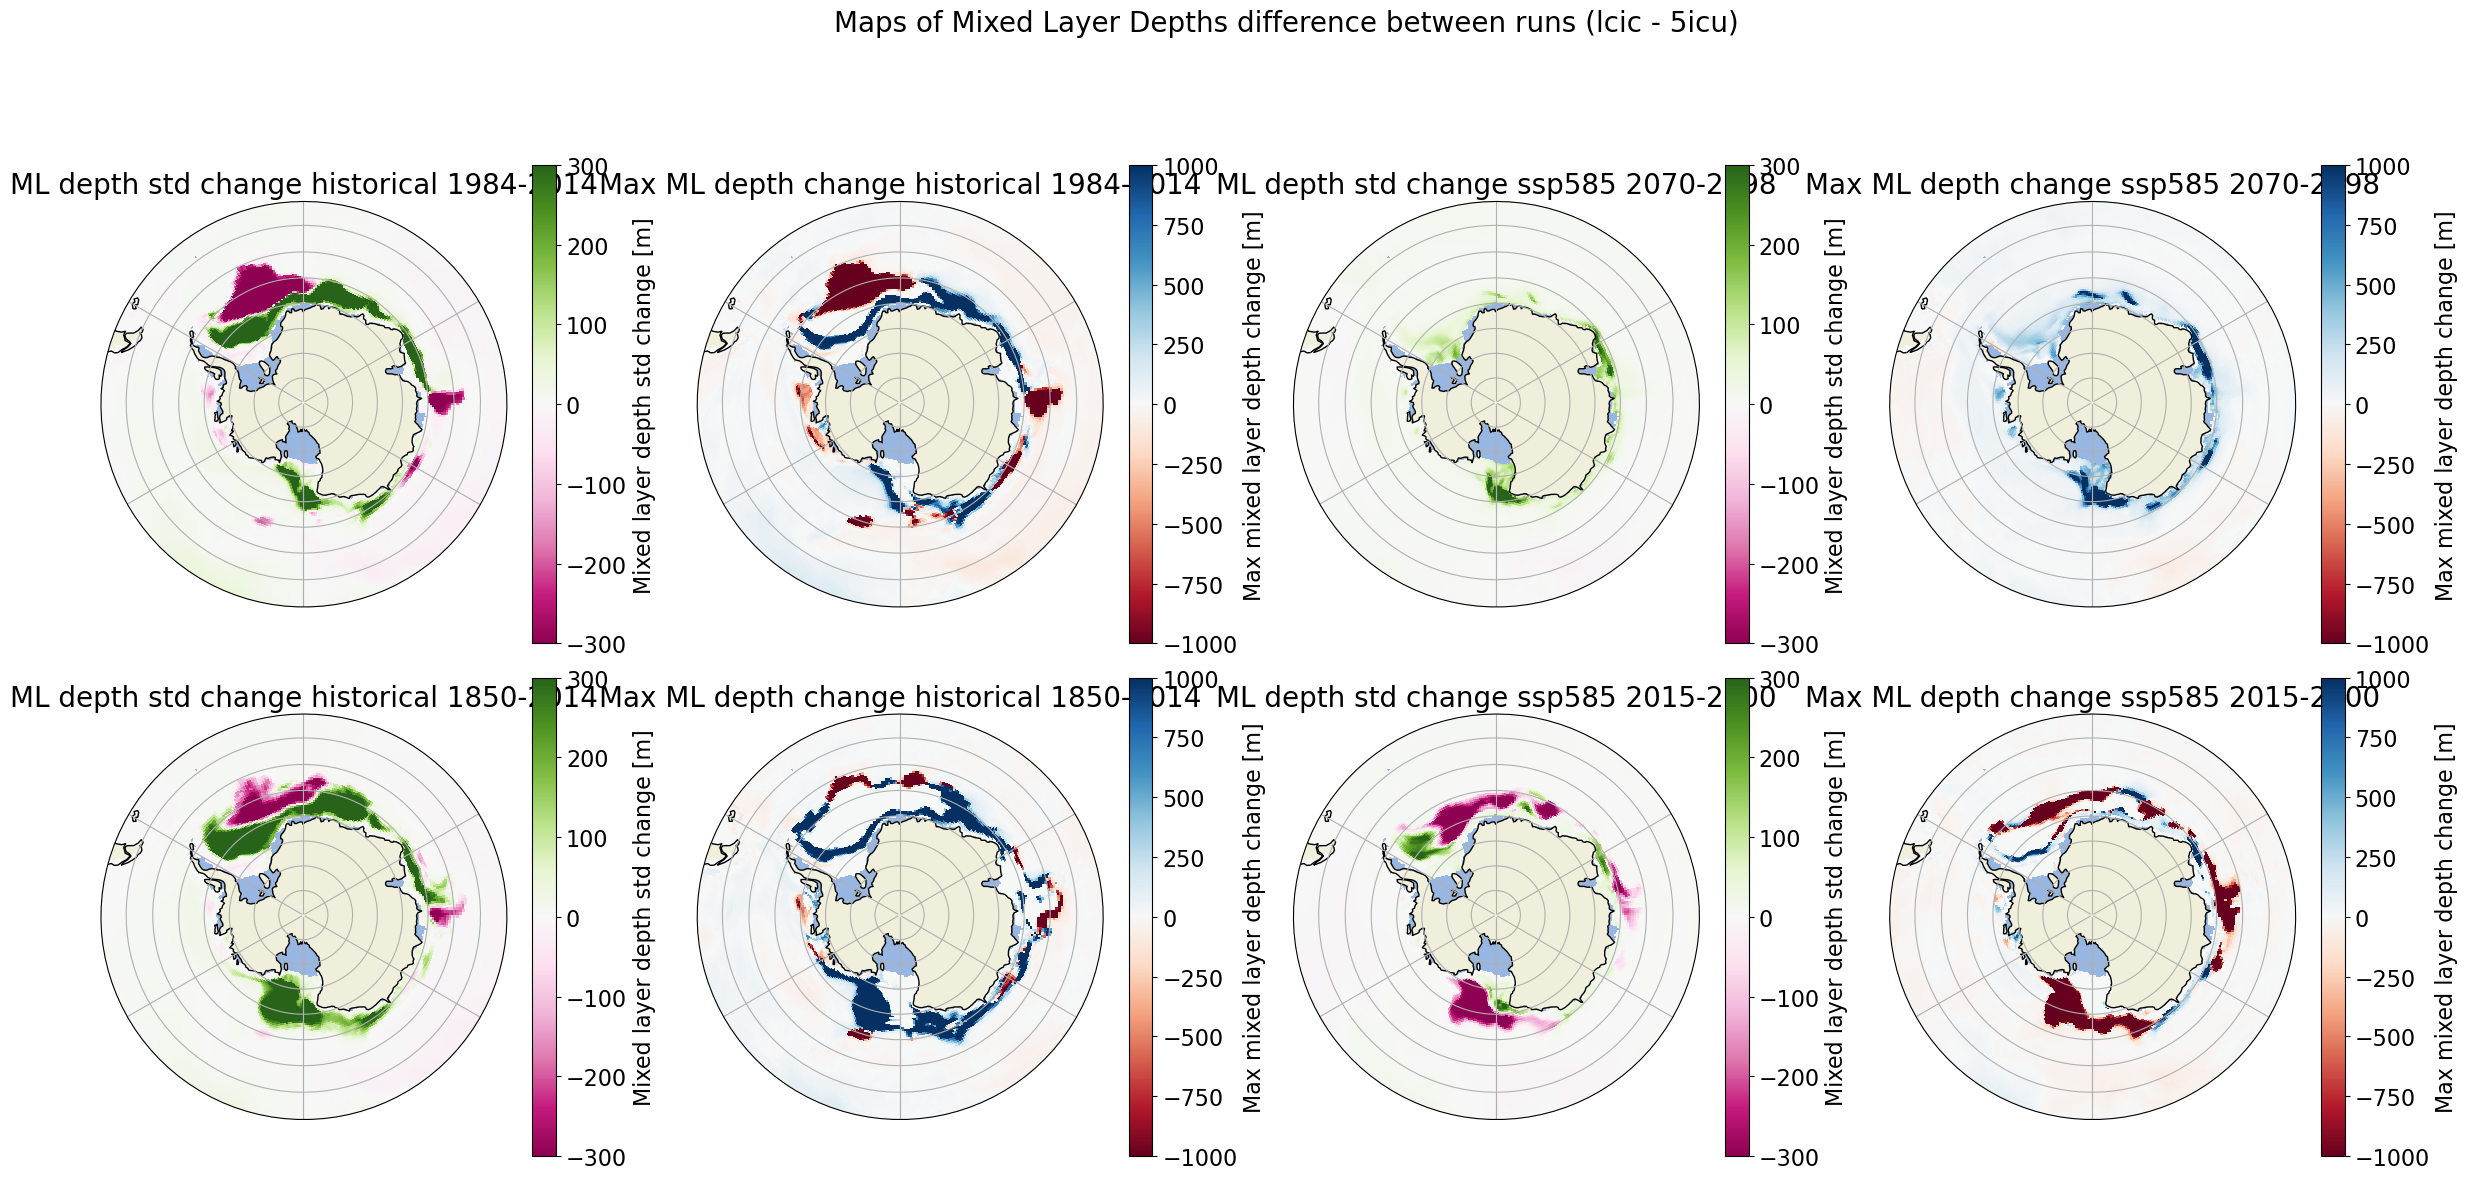

<Figure size 640x480 with 0 Axes>

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(24, 12), subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig.suptitle("Maps of Mixed Layer Depths difference between runs (lcic - 5icu)", fontsize=20)

map_plotter(mlotst_lcic_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).std('time') - mlotst_5icu_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).std('time'), 
            mlotst_lcic_hist, axes[0, 0], 'PiYG', -stdrange, stdrange, 
            'ML depth std change historical 1984-2014', 'Mixed layer depth std change [m]')

map_plotter(mlotst_lcic_hist.mlotst.std('time') - mlotst_5icu_hist.mlotst.std('time'), 
            mlotst_lcic_hist, axes[1, 0], 'PiYG', -stdrange, stdrange,
            'ML depth std change historical 1850-2014', 'Mixed layer depth std change [m]')

map_plotter(mlotst_lcic_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time') - mlotst_5icu_hist.mlotst.sel(time = slice("1984-01-01", "2014-12-31")).max('time'), 
            mlotst_lcic_hist, axes[0, 1], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change historical 1984-2014', 'Max mixed layer depth change [m]')

map_plotter(mlotst_lcic_hist.mlotst.max('time') - mlotst_5icu_hist.mlotst.max('time'),
            mlotst_lcic_hist, axes[1, 1], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change historical 1850-2014', 'Max mixed layer depth change [m]')

map_plotter(mlotst_lcic_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).std('time') - mlotst_5icu_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).std('time'), 
            mlotst_lcic_585, axes[0, 2], 'PiYG', -stdrange, stdrange,
            'ML depth std change ssp585 2070-2098', 'Mixed layer depth std change [m]')

map_plotter(mlotst_lcic_585.mlotst.std('time') - mlotst_5icu_585.mlotst.std('time'), 
            mlotst_lcic_585, axes[1, 2], 'PiYG', -stdrange, stdrange,
            'ML depth std change ssp585 2015-2100', 'Mixed layer depth std change [m]')

map_plotter(mlotst_lcic_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time') - mlotst_5icu_585.mlotst.sel(time = slice("2070-01-01", "2098-12-31")).max('time'), 
            mlotst_lcic_585, axes[0, 3], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change ssp585 2070-2098', 'Max mixed layer depth change [m]')

map_plotter(mlotst_lcic_585.mlotst.max('time')  - mlotst_5icu_585.mlotst.max('time'),
            mlotst_lcic_585, axes[1, 3], 'RdBu', -maxdepthrange, maxdepthrange,
            'Max ML depth change ssp585 2015-2100', 'Max mixed layer depth change [m]')


plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()
plt.clf()

In [13]:
jidx = range(34,37)
iidx = range(285,288)

In [14]:
def data_proc_mlotst(dataset, selected_years):
    processed_dataset = (dataset.mlotst.isel(j=jidx).isel(i=iidx)*(aco.areacello)).sum(['i','j'])/(aco.areacello.isel(j=jidx).isel(i=iidx).sum(['i','j']))
    grouped_dataset = processed_dataset.groupby('time.year')
    year_mask = processed_dataset['time.year'].isin(selected_years)
    selyears_processed_dataset = processed_dataset.sel(time=year_mask)
    monthly_mean = selyears_processed_dataset.groupby('time.month').mean(dim='time')
    monthly_std = selyears_processed_dataset.groupby('time.month').std(dim='time')
    #amun_mask = isel(j=range(15,30)).isel(i=range(160,220))
    #weddell_mask = isel(j=range(15,45)).isel(i=range(230,280))
    #processed_dataset = dataset.mlotst.isel(j=range(30,50)).isel(i=range(245,285))
    
    return processed_dataset, grouped_dataset, monthly_mean, monthly_std

In [15]:
proc_mlotst_sd_hist, grouped_mlotst_sd_hist, monthly_mean_sd_hist, monthly_std_sd_hist = data_proc_mlotst(mlotst_sd_hist, range(1984,2014,1))
proc_mlotst_sd_585, grouped_mlotst_sd_585, monthly_mean_sd_585, monthly_std_sd_585 = data_proc_mlotst(mlotst_sd_585, range(2070,2098,1))

proc_mlotst_5icu_hist, grouped_mlotst_5icu_hist, monthly_mean_5icu_hist, monthly_std_5icu_hist = data_proc_mlotst(mlotst_5icu_hist, range(1984,2014,1))
proc_mlotst_5icu_585, grouped_mlotst_5icu_585, monthly_mean_5icu_585, monthly_std_5icu_585= data_proc_mlotst(mlotst_5icu_585, range(2070,2098,1))

proc_mlotst_lcic_hist, grouped_mlotst_lcic_hist, monthly_mean_lcic_hist, monthly_std_lcic_hist = data_proc_mlotst(mlotst_lcic_hist, range(1850,2014,1))
proc_mlotst_lcic_585, grouped_mlotst_lcic_585, monthly_mean_lcic_585, monthly_std_lcic_585 = data_proc_mlotst(mlotst_lcic_585, range(2070,2098,1))

In [16]:
def seasonal_cycle(monthly_mean_var, monthly_std_var, col, lw, lab):
    plt.plot(monthly_mean_var.month, monthly_mean_var, 
         color = col, linewidth = lw, label = lab)
    plt.fill_between(monthly_mean_var.month, 
                 monthly_mean_var+monthly_std_var, 
                 monthly_mean_var-monthly_std_var, 
                 color = col, alpha = 0.37)

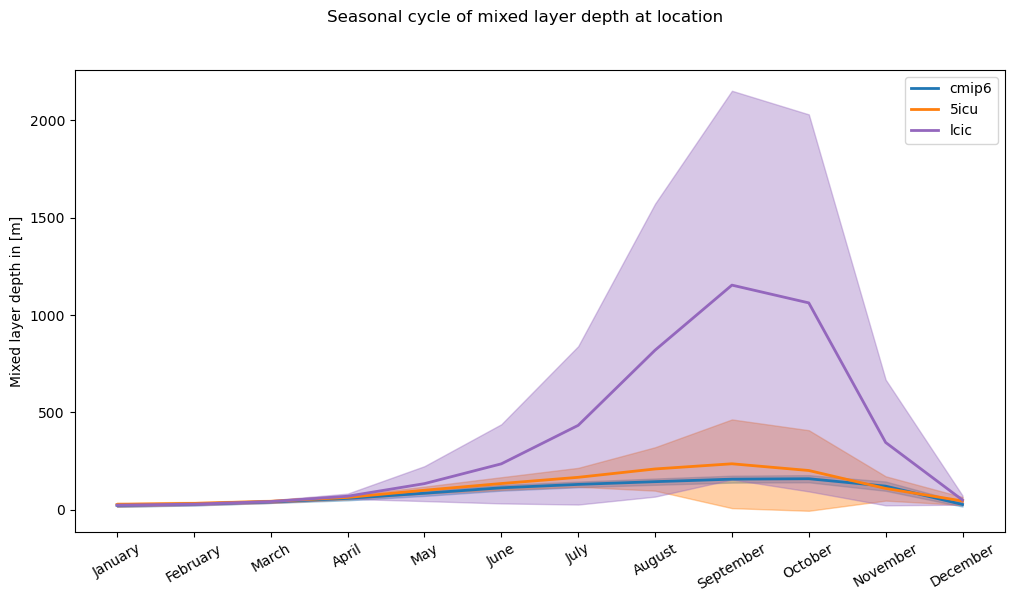

In [17]:
fig = plt.figure(figsize=[12,6])
fig.suptitle('Seasonal cycle of mixed layer depth at location')
seasonal_cycle(monthly_mean_sd_hist, monthly_std_sd_hist, 'tab:blue', 2, 'cmip6')
seasonal_cycle(monthly_mean_5icu_hist, monthly_std_5icu_hist, 'tab:orange', 2, '5icu')
seasonal_cycle(monthly_mean_lcic_hist, monthly_std_lcic_hist, 'tab:purple', 2, 'lcic')

# plt.plot(monthly_mean_rec.month, monthly_mean_rec, color = 'tab:orange', linewidth = 2, label = 'Recent 1984-2014')
# plt.fill_between(monthly_mean_rec.month, monthly_mean_rec+monthly_std_rec, monthly_mean_rec-monthly_std_rec, color = 'tab:orange', alpha = 0.37)

# plt.plot(monthly_mean_fut.month, monthly_mean_fut, color = 'tab:red', linewidth = 2, label = 'Future 2070-2100 (SSP585)')
# plt.fill_between(monthly_mean_fut.month, monthly_mean_fut+monthly_std_fut, monthly_mean_fut-monthly_std_fut, color = 'tab:red', alpha = 0.37)
tick_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.xticks(np.arange(1, 13, 1), tick_months, rotation = 30)
#plt.ylim(0,18)
plt.ylabel('Mixed layer depth in [m]')
plt.legend()
plt.show()

In [18]:
def gpm_mlotst(dataset):
    #processed_dataset = (dataset.mlotst.isel(j=jidx).isel(i=iidx)*(aco.areacello)).sum(['i','j'])/(aco.areacello.isel(j=jidx).isel(i=iidx).sum(['i','j']))
    dataset_gpm = dataset.groupby('time.month')
    #amun_mask = isel(j=range(15,30)).isel(i=range(160,220))
    #weddell_mask = isel(j=range(15,45)).isel(i=range(230,280))
    #processed_dataset = dataset.mlotst.isel(j=range(30,50)).isel(i=range(245,285))
    
    return dataset_gpm

In [19]:
mlotst_sd_hist_gpm = gpm_mlotst(mlotst_sd_hist)
mlotst_sd_585_gpm = gpm_mlotst(mlotst_sd_585)

mlotst_5icu_hist_gpm = gpm_mlotst(mlotst_5icu_hist)
mlotst_5icu_585_gpm = gpm_mlotst(mlotst_5icu_585)

mlotst_lcic_hist_gpm = gpm_mlotst(mlotst_lcic_hist)
mlotst_lcic_585_gpm = gpm_mlotst(mlotst_lcic_585)

In [20]:
mlotst_sd_tot = xr.concat([proc_mlotst_sd_hist, proc_mlotst_sd_585], dim='time')
mlotst_5icu_tot = xr.concat([proc_mlotst_5icu_hist, proc_mlotst_5icu_585], dim='time')
mlotst_lcic_tot = xr.concat([proc_mlotst_lcic_hist, proc_mlotst_lcic_585], dim='time')


In [21]:
mlotst_sd_tot_gpm = gpm_mlotst(mlotst_sd_tot)
mlotst_5icu_tot_gpm = gpm_mlotst(mlotst_5icu_tot)
mlotst_lcic_tot_gpm = gpm_mlotst(mlotst_lcic_tot)


In [22]:
jidx = range(39,42) 
iidx = range(264,267) 

# loc 1
# jidx = range(39,42)
# iidx = range(264,267)

# loc 2
# jidx = range(34,37) 
# iidx = range(285,288) 

#loc 3
# jidx = range(44,47) 
# iidx = range(14,17) 

In [23]:
def data_proc_mlotst(dataset):
    processed_dataset = (dataset.mlotst.isel(j=jidx).isel(i=iidx)*(aco.areacello)).sum(['i','j'])/(aco.areacello.isel(j=jidx).isel(i=iidx).sum(['i','j'])) # calculating weighted average over the indices chosen, generates a 1D timeseries
    return processed_dataset

In [24]:
proc_mlotst_sd_hist = data_proc_mlotst(mlotst_sd_hist)
proc_mlotst_sd_585= data_proc_mlotst(mlotst_sd_585)

proc_mlotst_5icu_hist = data_proc_mlotst(mlotst_5icu_hist)
proc_mlotst_5icu_585 = data_proc_mlotst(mlotst_5icu_585)

proc_mlotst_lcic_hist = data_proc_mlotst(mlotst_lcic_hist)
proc_mlotst_lcic_585 = data_proc_mlotst(mlotst_lcic_585)

mlotst_sd_tot = xr.concat([proc_mlotst_sd_hist, proc_mlotst_sd_585], dim='time')
mlotst_lcic_tot = xr.concat([proc_mlotst_lcic_hist, proc_mlotst_lcic_585], dim='time')

mlotst_sd_tot_gpm = mlotst_sd_tot.groupby('time.month')
mlotst_lcic_tot_gpm = mlotst_lcic_tot.groupby('time.month')

start_year = 1851
end_year = 1883
reference_time_range = pd.date_range(start=str(start_year), end=str(end_year), freq='MS')  # 'MS' for monthly start frequency

# Step 2: Create a placeholder DataArray for a specific variable
# You can use NaN or other placeholder values for missing data
placeholder_data = [0] * len(reference_time_range)  # Placeholder values for a specific variable

# Create the DataArray
placeholder_da = xr.DataArray(placeholder_data, coords={'time': reference_time_range}, dims=['time'])

# Explicitly rechunk the placeholder DataArray
# For example, you can set a fixed chunk size, e.g., 12 months per chunk
placeholder_da = placeholder_da.chunk({'time': 12})

# Step 3: Combine the original DataArray and the placeholder DataArray
# Assuming 'original_da' is your original DataArray
combined_da = xr.concat([placeholder_da, proc_mlotst_5icu_hist], dim='time')

mlotst_5icu_tot = xr.concat([combined_da, proc_mlotst_5icu_585], dim='time')
mlotst_5icu_tot_gpm = mlotst_5icu_tot.groupby('time.month')
mlotst_5icu_tot

<xarray.DataArray (time: 2989)>
dask.array<concatenate, shape=(2989,), dtype=float64, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1851-01-01 1851-02-01 ... 2098-12-16T12:00:00

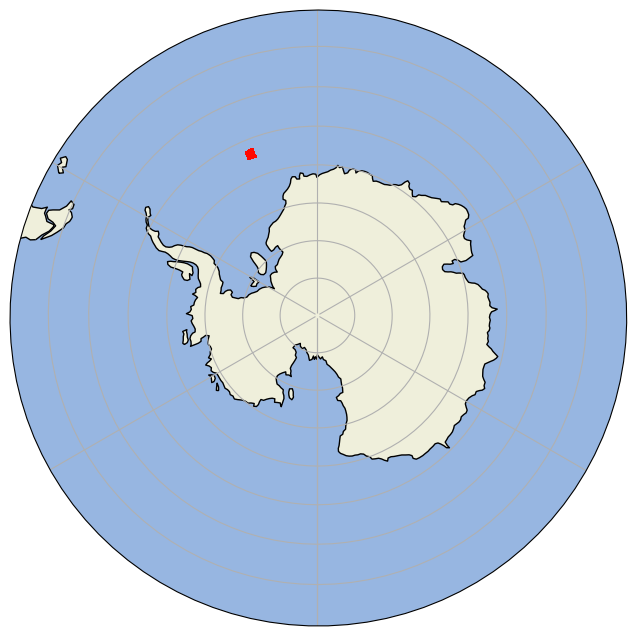

<Figure size 640x480 with 0 Axes>

In [25]:
jidx = range(39, 42) 
iidx = range(264,267) 

# loc 1
# jidx = range(39,42)
# iidx = range(264,267)

# loc 2
# jidx = range(34,37) 
# iidx = range(285,288) 

#loc 3
# jidx = range(44,47) 
# iidx = range(14,17) 

mlotst_sd_hist_sel = mlotst_sd_hist.mlotst.isel(time=1).isel(i = iidx).isel(j = jidx)


fig = plt.figure(figsize=[8, 8])
#fig.suptitle('Map of mld ', fontsize = 16)

ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
# Limit the map to -50 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.gridlines()
ax1.coastlines()

#make circular instead of square plot by setting circular boundaries
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_boundary(circle, transform=ax1.transAxes)

im = ax1.pcolormesh(mlotst_sd_hist_sel.longitude, mlotst_sd_hist_sel.latitude,
                    mlotst_sd_hist_sel,
                    cmap = 'autumn', vmin = 0, vmax = 500, 
                    transform=ccrs.PlateCarree()
)# .isel(i=iidx).isel(j=jidx)
plt.show()
plt.clf()

In [26]:
def ts_plotter(dataset, month, colorstring, labelstring, ax):
    ax.plot(dataset[month], color=colorstring, label=labelstring)
    xtick_locs = np.arange(0, 250 + 1, 50)
    tick_years = np.arange(1850, 2100 + 1, 50)
    ax.set_xticks(xtick_locs)
    ax.set_xticklabels(tick_years)  # Added line to set tick labels
    ax.tick_params(direction='in')
    ax.grid(linestyle='--')
    ax.set_ylabel('Maximum MLD [m]')  # Fixed the method name
    ax.legend()

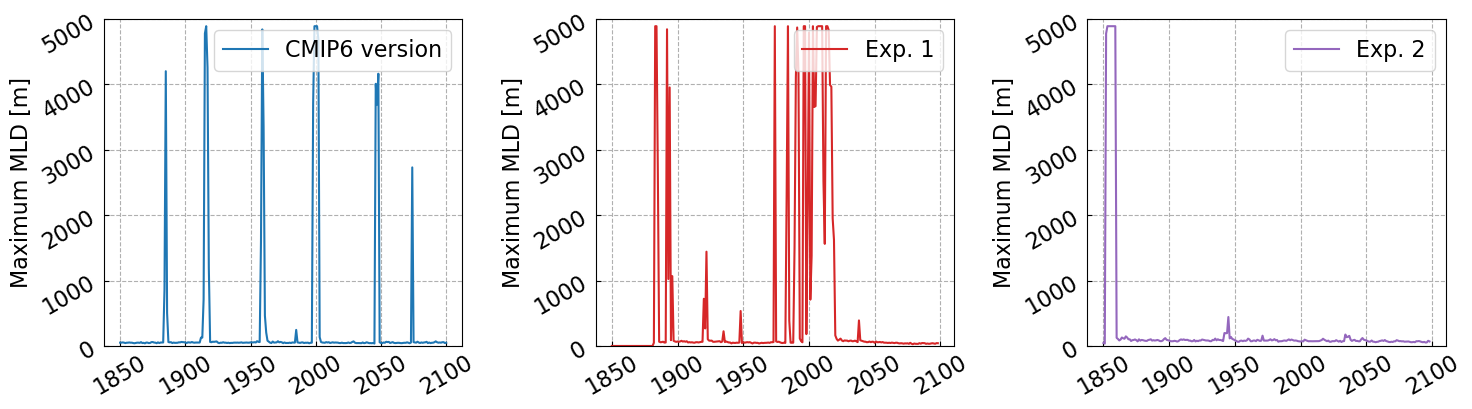

In [27]:

def ts_plotter(dataset, month, colorstring, labelstring, ax):
    ax.plot(dataset[month], color=colorstring, label=labelstring, )
    xtick_locs = np.arange(0, 250 + 1, 50)
    tick_years = np.arange(1850, 2100 + 1, 50)
    ax.set_ylim(0, 5000)
    ax.set_xticks(xtick_locs)
    ax.set_xticklabels(tick_years)  # Added line to set tick labels
    ax.tick_params(direction='in', labelsize = 16, rotation =30)
    ax.grid(linestyle='--')
    ax.set_ylabel('Maximum MLD [m]', fontsize = 16)  # Fixed the method name
    ax.legend(fontsize = 16, loc = 'upper right')
    

# Create a figure with 3 subplots 1 by 3
sizemlf = 1.5
fig, axes = plt.subplot_mosaic("ABC", figsize=(10 * sizemlf, 3 * sizemlf))
fig.tight_layout(pad=2)

ts_plotter(mlotst_sd_tot_gpm, 9, 'tab:blue', 'CMIP6 version', axes['A'])

ts_plotter(mlotst_5icu_tot_gpm, 9, 'tab:red', 'Exp. 1', axes['B'])

ts_plotter(mlotst_lcic_tot_gpm, 9, 'tab:purple', 'Exp. 2', axes['C'])

# Add labels outside the subplots
# fig.text(0.02, 0.5, 'A', fontsize=12, fontweight='bold', va='center', rotation='vertical')
# fig.text(0.02, 0.33, 'B', fontsize=12, fontweight='bold', va='center', rotation='vertical')
# fig.text(0.02, 0.16, 'C', fontsize=12, fontweight='bold', va='center', rotation='vertical')

plt.tight_layout(pad=1.2 * sizemlf)
plt.subplots_adjust(top=0.9) 
plt.show()